### Pandas : Dataframe으로 데이터 불러오기
read_csv() : **데이터프레임** 형식으로 데이터 파일 불러오기 

In [3]:
import pandas as pd
csv_test = pd.read_csv("./res/test_csv_file.csv")
csv_test

,ID,LAST_NAME,AGE
0,1,KIM,30
1,2,CHOI,25
2,3,LEE,41
3,4,PARK,19
4,5,LIM,36


### Pandas : Dataframe으로 불러와서 header 처리

In [7]:
# txt_test = pd.read_csv("./res/test_text_file.txt", sep="|", index_col=0) 
# txt_test = pd.read_csv("./res/test_text_file.txt", sep="|", index_col="id") # Error 대소문자 구분
txt_test = pd.read_csv("./res/test_text_file.txt", sep="|", index_col="ID") 
txt_test

,A,B,C,D
ID,,,,
C1,1,2,3,4
C2,5,6,7,8
C3,1,3,5,7


행 index = 0, 1, 2 → 데이터 구분자, 참조 위치<br>
열 index = ID, A, B, C, D → ID가 구분자로 있으므로 행 index(default)가 필요없다<br>
pd.read_csv(경로, sep=구분자, **index_col**=행 index로 사용할 col의 index, col name)

In [17]:
# header가 없는 데이터에 header 부여
text = pd.read_csv("./res/text_without_column_name.txt", sep="|", header=None, names=["ID", "A", "B", "C", "D"]) 
text

,ID,A,B,C,D
0,C1,1,2,3,4
1,C2,5,6,7,8
2,C3,1,3,5,7


In [18]:
type(text)
text.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
ID    3 non-null object
A     3 non-null int64
B     3 non-null int64
C     3 non-null int64
D     3 non-null int64
dtypes: int64(4), object(1)
memory usage: 200.0+ bytes


**[중요] info()** : Pandas에서 dataframe의 정보를 볼수있는 함수. R에서는 structure() 사용 <br>
object : string → string 객체가 따로 없음<br><br>

### Pandas : 데이터 저장

In [19]:
data = {"ID": ["A1", "A2", "A3"],
       "X1": [10, 20, 30],
       "X2": [1.1, 2.2, 3.3]}

In [21]:
df = pd.DataFrame(data, index=["a1", "a2", "a3"]) # 행 index 지정
df

,ID,X1,X2
a1,A1,10,1.1
a2,A2,20,2.2
a3,A3,30,3.3


In [24]:
# 데이터프레임에 행 추가(index 사용)
df2 = df.reindex(["a1", "a2", "a3", "a4"])
df2 

,ID,X1,X2
a1,A1,10.0,1.1
a2,A2,20.0,2.2
a3,A3,30.0,3.3
a4,NaN,NaN,NaN


Pandas NaN(=결측값, 값이 없다), Deep Nan(inf → 발산, 학습과정에서 learning rate 조정이 필요)
1. 정말 데이터가 없는 경우
2. 사용자가 데이터를 누락한 경우
3. 인위적으로 결측값으로 지정하는 경우

In [25]:
df2.to_csv("./res/dt2.csv")

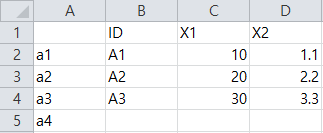

In [31]:
df2.to_csv("./res/dt2_.csv", sep="?")

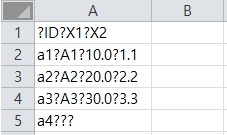

In [29]:
df2.to_csv("./res/dt2_.csv", sep=",") # sep="," 생략 가능

In [33]:
df2.to_csv("./res/dt2.csv", sep=",", na_rep="NaN")

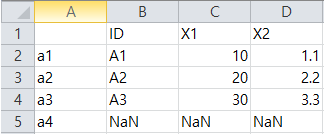